# Importing the Libraries

In [ ]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers, optimizers
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import layers
from keras.metrics import categorical_crossentropy
from tensorflow.keras import Model, Input
from tensorflow.keras import utils
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import augmentations

# Loading and Preprocessing the Data


In [ ]:
%cp /content/drive/MyDrive/Dataset/ -r /content/

In [ ]:
train = tf.keras.utils.image_dataset_from_directory(
    '/content/Dataset/Train',
    labels='inferred' ,
    label_mode = 'categorical',
    color_mode="rgb",
    image_size=(64, 64),
    shuffle=True,
    batch_size=128,
    seed= 10,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

val = tf.keras.utils.image_dataset_from_directory(
    '/content/Dataset/Val',
    labels='inferred' ,
    label_mode = 'categorical',
    color_mode="rgb",
    image_size=(64, 64),
    shuffle=False,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

test = tf.keras.utils.image_dataset_from_directory(
    '/content/Dataset/Test',
    labels='inferred' ,
    label_mode = 'categorical',
    color_mode="rgb",
    image_size=(64, 64),
    shuffle=False,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 5908 files belonging to 4 classes.
Found 855 files belonging to 4 classes.
Found 825 files belonging to 4 classes.


In [ ]:
aug_2 = layers.Rescaling(1./255)

train = train.map(lambda x, y: (aug_2(x), y))
val = val.map(lambda x, y: (aug_2(x), y)) 
test = test.map(lambda x, y: (aug_2(x), y)) 

In [ ]:
y_test = np.concatenate([y for x, y in val], axis=0)
x_test = np.concatenate([x for x, y in val], axis=0)

# DenseNet


In [ ]:
Network = tf.keras.applications.DenseNet121(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(64,64,3),
    pooling='avg',
)
Network.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 70, 70, 3)   0           ['input_6[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 32, 32, 64)   9408        ['zero_padding2d_2[0][0]']       
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1/conv[0][0]']   

In [ ]:
for layer in Network.layers[:-5]: 
  layer.trainable = False
last_layer = Network.get_layer('avg_pool')
last_output = last_layer.output
x = tf.keras.layers.Dense(4, activation='softmax')(last_output)

In [ ]:
model = Model(inputs=Network.input, outputs=x) 
model.compile(keras.optimizers.Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train, validation_data=val, epochs=10, verbose=1)

Epoch 1/10
94/94 [==============================] - 11s 60ms/step - loss: 1.7994 - accuracy: 0.2973 - val_loss: 1.9508 - val_accuracy: 0.2784
Epoch 2/10
94/94 [==============================] - 4s 40ms/step - loss: 1.5575 - accuracy: 0.3615 - val_loss: 1.4986 - val_accuracy: 0.3649
Epoch 3/10
94/94 [==============================] - 4s 40ms/step - loss: 1.3717 - accuracy: 0.4201 - val_loss: 1.2883 - val_accuracy: 0.4468
Epoch 4/10
94/94 [==============================] - 4s 40ms/step - loss: 1.2262 - accuracy: 0.4777 - val_loss: 1.1533 - val_accuracy: 0.5088
Epoch 5/10
94/94 [==============================] - 4s 40ms/step - loss: 1.1013 - accuracy: 0.5279 - val_loss: 1.0494 - val_accuracy: 0.5684
Epoch 6/10
94/94 [==============================] - 4s 41ms/step - loss: 0.9923 - accuracy: 0.5761 - val_loss: 0.9615 - val_accuracy: 0.6187
Epoch 7/10
94/94 [==============================] - 4s 41ms/step - loss: 0.9013 - accuracy: 0.6200 - val_loss: 0.8868 - val_accuracy: 0.6526
Epoch 8/10
9

We will train more

In [ ]:
history2 = model.fit(train, validation_data=val, epochs=10, verbose=1)

Epoch 1/10
94/94 [==============================] - 4s 41ms/step - loss: 0.6421 - accuracy: 0.7607 - val_loss: 0.6678 - val_accuracy: 0.7637
Epoch 2/10
94/94 [==============================] - 4s 41ms/step - loss: 0.5948 - accuracy: 0.7882 - val_loss: 0.6284 - val_accuracy: 0.7766
Epoch 3/10
94/94 [==============================] - 4s 41ms/step - loss: 0.5547 - accuracy: 0.8067 - val_loss: 0.5926 - val_accuracy: 0.7895
Epoch 4/10
94/94 [==============================] - 4s 40ms/step - loss: 0.5179 - accuracy: 0.8246 - val_loss: 0.5601 - val_accuracy: 0.8023
Epoch 5/10
94/94 [==============================] - 4s 40ms/step - loss: 0.4847 - accuracy: 0.8433 - val_loss: 0.5302 - val_accuracy: 0.8175
Epoch 6/10
94/94 [==============================] - 4s 40ms/step - loss: 0.4547 - accuracy: 0.8573 - val_loss: 0.5033 - val_accuracy: 0.8281
Epoch 7/10
94/94 [==============================] - 4s 40ms/step - loss: 0.4306 - accuracy: 0.8695 - val_loss: 0.4787 - val_accuracy: 0.8327
Epoch 8/10
94

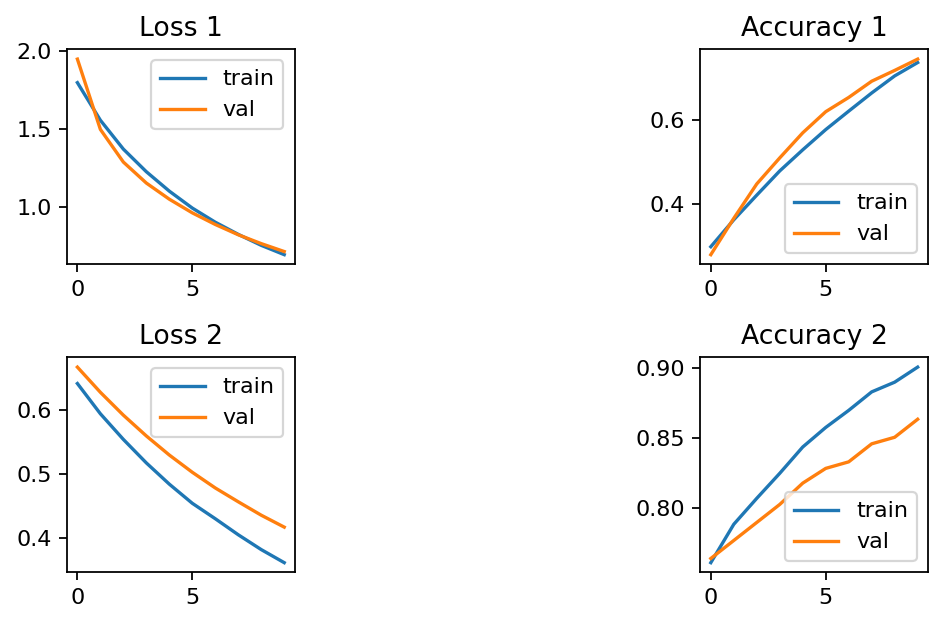

In [ ]:
plt.figure( dpi=160)

plt.subplot(231)
plt.title('Loss 1')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()

plt.subplot(233)
plt.title('Accuracy 1')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()

plt.subplot(234)
plt.title('Loss 2')
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='val')
plt.legend()

plt.subplot(236)
plt.title('Accuracy 2')
plt.plot(history2.history['accuracy'], label='train')
plt.plot(history2.history['val_accuracy'], label='val')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
y_hat = model.predict(x_test)

27/27 [==============================] - 2s 18ms/step


In [ ]:
y_hat[y_hat>=0.5] = 1
y_hat[y_hat<0.5] = 0


For Test Set
F1 score:  0.8606658446362516
Accuracy:  0.816374269005848
Precision:  0.910039113428944
Recall:  0.816374269005848
Confusion Matrix: 



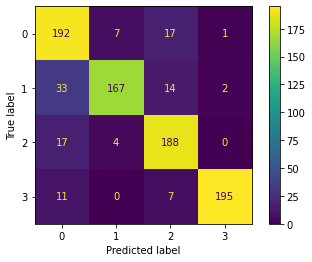

In [ ]:
print('\nFor Test Set')
f1 = f1_score(y_test, y_hat, average='micro')
print('F1 score: ' , f1)

accuracy = accuracy_score(y_test, y_hat)
print('Accuracy: ' , accuracy)

precision = precision_score(y_test, y_hat, average='micro')
print('Precision: ' , precision)

recall = recall_score(y_test, y_hat, average='micro')
print('Recall: ' , recall)

matrix = ConfusionMatrixDisplay(confusion_matrix(y_test.argmax(axis=1), y_hat.argmax(axis=1)))
print('Confusion Matrix: \n')
matrix.plot()
plt.show()

# ResNet

In [ ]:
Network = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(64,64,3),
    pooling='avg',
)
Network.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_7[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [ ]:
for layer in Network.layers[:-5]: 
  layer.trainable = False
last_layer = Network.get_layer('avg_pool')
last_output = last_layer.output
x = tf.keras.layers.Dense(4, activation='softmax')(last_output)

In [ ]:
model = Model(inputs=Network.input, outputs=x) 
model.compile(keras.optimizers.Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train, validation_data=val, epochs=20, verbose=1)

Epoch 1/20
94/94 [==============================] - 8s 48ms/step - loss: 1.2516 - accuracy: 0.5477 - val_loss: 1.5119 - val_accuracy: 0.2409
Epoch 2/20
94/94 [==============================] - 4s 39ms/step - loss: 0.9593 - accuracy: 0.7607 - val_loss: 1.4971 - val_accuracy: 0.2491
Epoch 3/20
94/94 [==============================] - 4s 38ms/step - loss: 0.8082 - accuracy: 0.7801 - val_loss: 1.4797 - val_accuracy: 0.3123
Epoch 4/20
94/94 [==============================] - 4s 38ms/step - loss: 0.7092 - accuracy: 0.7944 - val_loss: 1.4485 - val_accuracy: 0.4012
Epoch 5/20
94/94 [==============================] - 4s 38ms/step - loss: 0.6378 - accuracy: 0.8105 - val_loss: 1.3490 - val_accuracy: 0.4363
Epoch 6/20
94/94 [==============================] - 4s 38ms/step - loss: 0.5844 - accuracy: 0.8212 - val_loss: 1.1250 - val_accuracy: 0.5240
Epoch 7/20
94/94 [==============================] - 4s 38ms/step - loss: 0.5409 - accuracy: 0.8354 - val_loss: 0.9560 - val_accuracy: 0.6094
Epoch 8/20
94

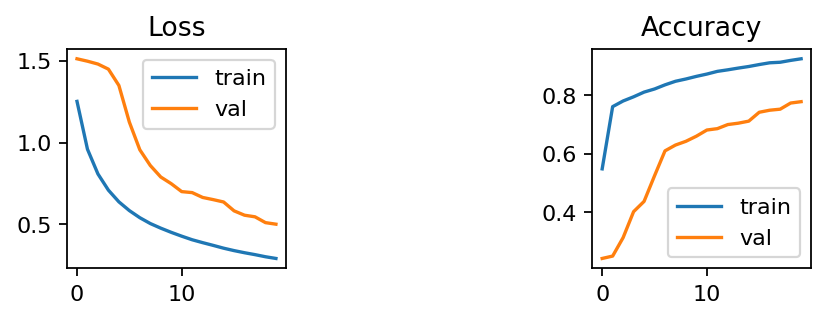

In [ ]:
plt.figure( dpi=160)

plt.subplot(231)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()

plt.subplot(233)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()

In [ ]:
y_hat = model.predict(x_test)

27/27 [==============================] - 1s 9ms/step


In [ ]:
y_hat[y_hat>=0.5] = 1
y_hat[y_hat<0.5] = 0


For Test Set
F1 score:  0.8606658446362516
Accuracy:  0.816374269005848
Precision:  0.910039113428944
Recall:  0.816374269005848
Confusion Matrix: 



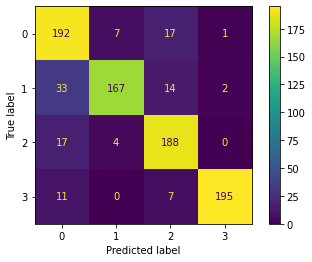

In [ ]:
print('\nFor Test Set')
f1 = f1_score(y_test, y_hat, average='micro')
print('F1 score: ' , f1)

accuracy = accuracy_score(y_test, y_hat)
print('Accuracy: ' , accuracy)

precision = precision_score(y_test, y_hat, average='micro')
print('Precision: ' , precision)

recall = recall_score(y_test, y_hat, average='micro')
print('Recall: ' , recall)

matrix = ConfusionMatrixDisplay(confusion_matrix(y_test.argmax(axis=1), y_hat.argmax(axis=1)))
print('Confusion Matrix: \n')
matrix.plot()
plt.show()

# VGG16

In [ ]:
Network = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(64,64,3),
    pooling='avg',
)
Network.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
for layer in Network.layers[:-4]: 
  layer.trainable = False
last_layer = Network.get_layer('global_average_pooling2d_2')
last_output = last_layer.output
x = tf.keras.layers.Dense(4, activation='softmax')(last_output)

In [ ]:
model = Model(inputs=Network.input, outputs=x) 
model.compile(keras.optimizers.Adam(learning_rate=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train, validation_data=val, epochs=20, verbose=1)

Epoch 1/20
94/94 [==============================] - 4s 37ms/step - loss: 1.4564 - accuracy: 0.2988 - val_loss: 1.3643 - val_accuracy: 0.4175
Epoch 2/20
94/94 [==============================] - 3s 34ms/step - loss: 1.2729 - accuracy: 0.4854 - val_loss: 1.1980 - val_accuracy: 0.6164
Epoch 3/20
94/94 [==============================] - 4s 35ms/step - loss: 1.1042 - accuracy: 0.7737 - val_loss: 1.0171 - val_accuracy: 0.7942
Epoch 4/20
94/94 [==============================] - 4s 35ms/step - loss: 0.9177 - accuracy: 0.8823 - val_loss: 0.8224 - val_accuracy: 0.8573
Epoch 5/20
94/94 [==============================] - 4s 35ms/step - loss: 0.7319 - accuracy: 0.9222 - val_loss: 0.6418 - val_accuracy: 0.9158
Epoch 6/20
94/94 [==============================] - 4s 35ms/step - loss: 0.5708 - accuracy: 0.9467 - val_loss: 0.4989 - val_accuracy: 0.9474
Epoch 7/20
94/94 [==============================] - 4s 35ms/step - loss: 0.4485 - accuracy: 0.9621 - val_loss: 0.3938 - val_accuracy: 0.9708
Epoch 8/20
94

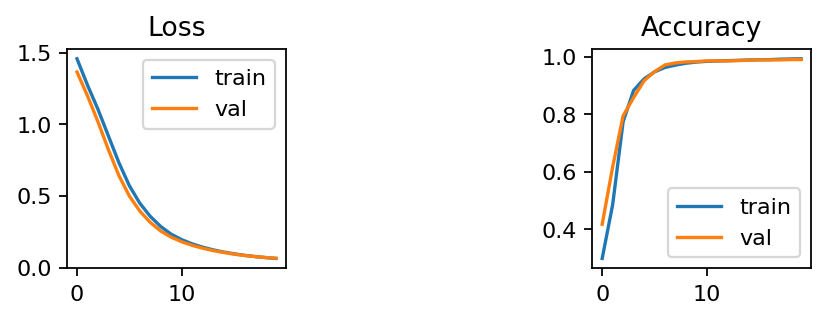

In [ ]:
plt.figure( dpi=160)

plt.subplot(231)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()

plt.subplot(233)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()

In [ ]:
y_hat = model.predict(x_test)

27/27 [==============================] - 0s 4ms/step


In [ ]:
y_hat[y_hat>=0.5] = 1
y_hat[y_hat<0.5] = 0


For Test Set
F1 score:  0.9888823873610298
Accuracy:  0.9883040935672515
Precision:  0.9894613583138173
Recall:  0.9883040935672515
Confusion Matrix: 



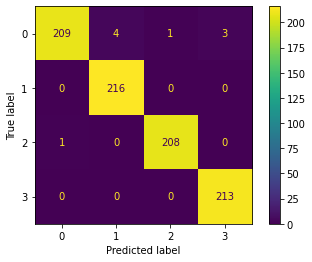

In [ ]:
print('\nFor Test Set')
f1 = f1_score(y_test, y_hat, average='micro')
print('F1 score: ' , f1)

accuracy = accuracy_score(y_test, y_hat)
print('Accuracy: ' , accuracy)

precision = precision_score(y_test, y_hat, average='micro')
print('Precision: ' , precision)

recall = recall_score(y_test, y_hat, average='micro')
print('Recall: ' , recall)

matrix = ConfusionMatrixDisplay(confusion_matrix(y_test.argmax(axis=1), y_hat.argmax(axis=1)))
print('Confusion Matrix: \n')
matrix.plot()
plt.show()